In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sktime.transformations.panel.dictionary_based import PAA

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from matrixprofile import *

Loading the data 

In [3]:
def load_npy(filename):
    return np.load(filename)

In [4]:
dir_path = 'dataset/dataset/time_series/'
len_threshold = 1280 # we don't use all the observations, because they are too many

In [5]:
X, y, ids = [], [], []

for file in os.listdir(dir_path):
    if os.path.splitext(file)[1] != '.npy':
        continue

    split = file.split("_")
    ids.append(split[0]) # track_id
    y.append(split[1][:-4]) # genre
    ts = load_npy(dir_path + file)
    
    if len(ts) > len_threshold:
        ts = ts[0:len_threshold]
    else:
        pad = [np.mean(ts[:-5])] * (len_threshold-len(ts)) # fill by mean value of last n observations
        # pad = [ts[-1]] * (len_threshold-len(ts)) # fill with last observation
        ts = np.append(ts, pad) 

    X.append([ts])

X, y, ids = np.array(X), np.array(y), np.array(ids)

In [6]:
y

array(['happy', 'emo', 'world-music', ..., 'world-music', 'sleep',
       'sleep'], dtype='<U17')

In [7]:
# only if i want them saved as .npy, the way they were before
#np.savez('X_y_ids', X, y, ids)

#reload
#X_y_ids = load_npy('X_y_ids.npz') 
#X, y, ids = X_y_ids['arr_0'], X_y_ids['arr_1'], X_y_ids['arr_2']

Approximation

In [8]:
def approximate(ts, approx):
    return approx.fit_transform(ts)

In [9]:
paa = PAA(num_intervals=100) # Piecewise Aggregate Approximation w. 100 intervals

In [10]:
X_paa = np.array([[approximate(ts[0], paa)[:,0]] for ts in X])
X_paa.shape

(10000, 1, 100)

In [11]:
y = LabelEncoder().fit_transform(y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 1, 1280), (2000, 1, 1280), (8000,), (2000,))

In [13]:
df = pd.DataFrame(np.squeeze(X_train))
df["genre"] = y_train

In [14]:
df

,0,1,2,3,4,5,6,7,8,9,...,1271,1272,1273,1274,1275,1276,1277,1278,1279,genre
0,2955.912519,3101.818477,3272.584293,3380.281979,3608.045816,3431.920391,3085.475347,2751.071083,2535.501991,2575.349922,...,3006.836347,2986.229993,3230.841796,3768.076261,3952.493799,3832.393961,3727.874208,3393.486798,3263.792289,14
1,1891.299674,1934.663056,2018.139162,1998.645078,1902.759073,1954.180303,2163.638460,2324.297996,2343.694475,2151.769747,...,2287.897476,2363.627150,2394.340551,2308.740740,2230.216541,2341.804537,2375.369200,2351.789632,2317.908739,11
2,1972.494343,1833.747381,1676.429118,1725.657584,1886.338926,1772.776093,1296.888940,2416.433847,3969.635581,4014.269826,...,3154.592147,4212.395613,4400.720917,3969.429351,3378.385107,2948.468921,2712.052937,2552.563638,2458.993549,0
3,2984.122135,2992.731940,2903.830742,2749.692814,2628.280025,2431.206178,2443.903613,2403.450923,2454.202428,2405.800163,...,2156.651609,2136.408632,2077.113992,2105.033114,1995.994525,1872.212448,1879.018588,1952.018141,2057.256236,19
4,2302.698345,2537.538658,2519.379277,2508.865911,2447.543056,2571.939704,2780.549847,2686.454643,2200.980015,1741.450521,...,1822.564272,1582.171144,1707.074587,2031.385335,2332.016193,2515.244486,2683.657134,2707.170535,2539.566622,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,929.874693,960.028276,1030.015266,1041.026104,928.305027,826.568171,1551.297211,2085.227500,1864.450935,1103.600740,...,1032.818836,1079.808589,1178.176386,1205.168427,1117.349446,1028.626959,1097.367867,1200.194695,1196.999265,1
7996,1716.297919,1585.884061,1446.057173,1323.666136,1280.243960,1294.675013,1276.656775,1288.481636,1255.873359,1261.053687,...,2609.515122,2598.612488,2456.212336,2438.158680,2514.074171,2477.775104,3067.430210,3739.774389,4263.972313,18
7997,2722.969644,2661.120420,2826.980805,2736.058792,2760.857507,2852.976711,2767.084710,2523.090652,2334.532227,2320.110688,...,2984.177712,2844.766267,2704.859565,2261.173705,2260.587493,2561.577614,2611.320413,2685.421966,2547.152376,4
7998,641.372840,624.418843,665.798004,666.853608,748.189624,774.508406,788.673935,773.888356,752.636084,659.688190,...,653.826172,668.146598,657.257989,650.770458,637.973278,626.609102,625.983430,647.151310,660.318979,1


In [15]:
df_filtered = df[df['genre'].isin([1, 10, 12, 14, 15])] 
df_melt = df_filtered.melt(value_name="observation", var_name="time", id_vars="genre")
df_melt

,genre,time,observation
0,14,0,2955.912519
1,1,0,1266.981258
2,12,0,400.707122
3,14,0,2379.606060
4,14,0,1435.378489
...,...,...,...
2559995,10,1279,1281.521660
2559996,10,1279,737.866611
2559997,12,1279,826.876705
2559998,1,1279,1196.999265


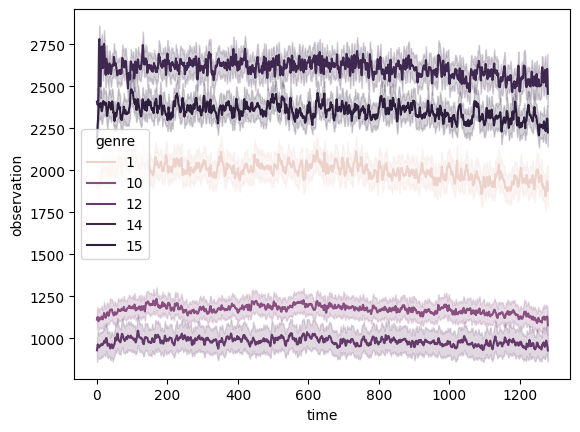

In [16]:
sns.lineplot(df_melt, x="time", y="observation", estimator="mean", hue="genre")
plt.show()

<Figure size 640x200 with 0 Axes>

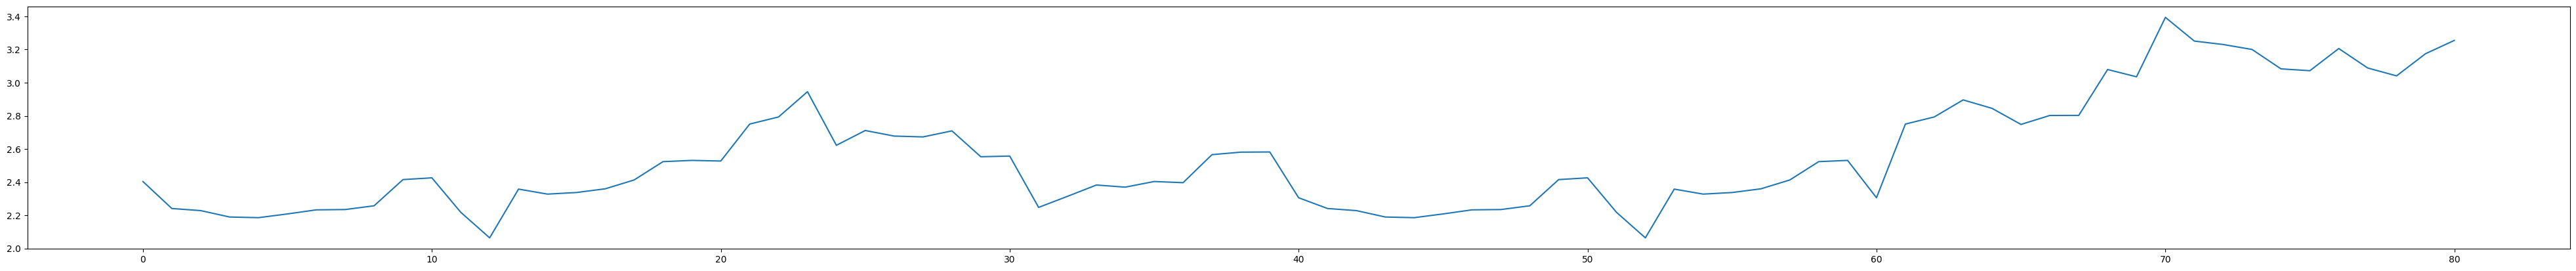

In [17]:
w = 20
mp, mpi = matrixProfile.stomp(X_paa[0][0], w)
    
plt.figure().set_figheight(2)
plt.figure().set_figwidth(50)
plt.plot(mp)
plt.show()

<Figure size 640x200 with 0 Axes>

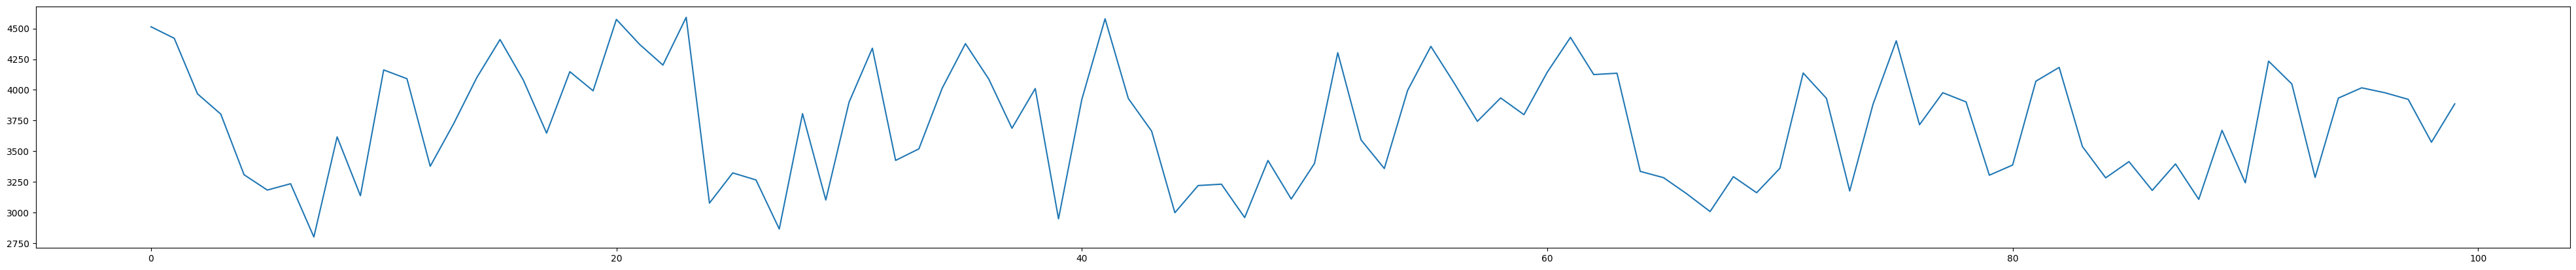

In [19]:
plt.figure().set_figheight(2)
plt.figure().set_figwidth(50)

plt.plot(X_paa[0][0])
plt.show()

In [24]:
mo, mod  = motifs.motifs(X_paa[0][0], (mp, mpi), max_motifs=5)

How to show the motifs on the graph

<Figure size 640x200 with 0 Axes>

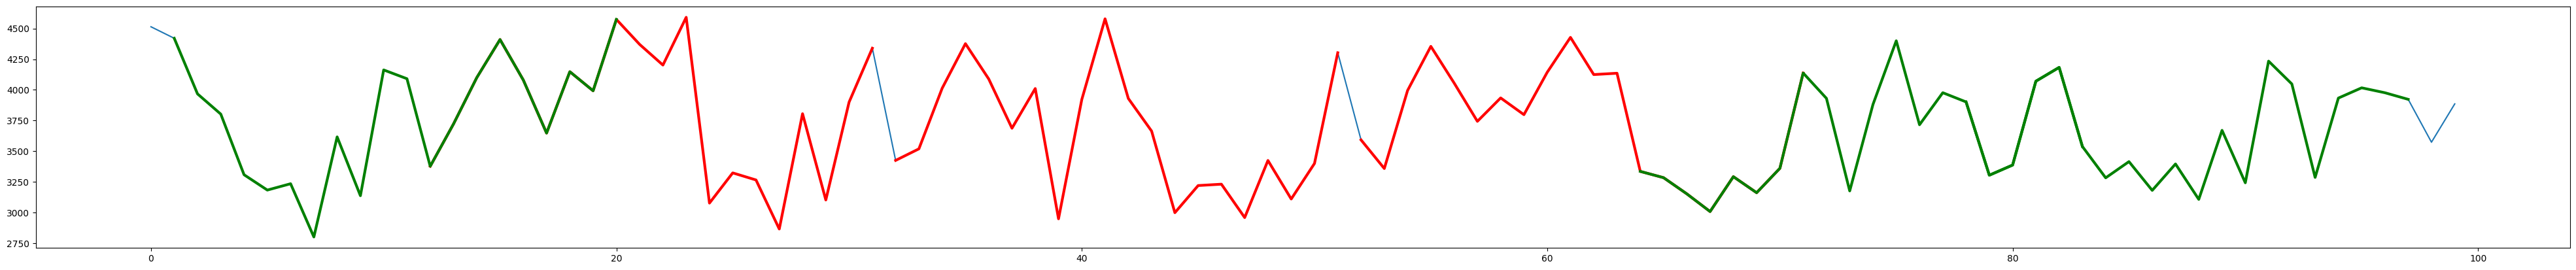

In [29]:
plt.figure().set_figheight(2)
plt.figure().set_figwidth(50)
plt.plot(X_paa[0][0])

colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = X_paa[0][0][i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

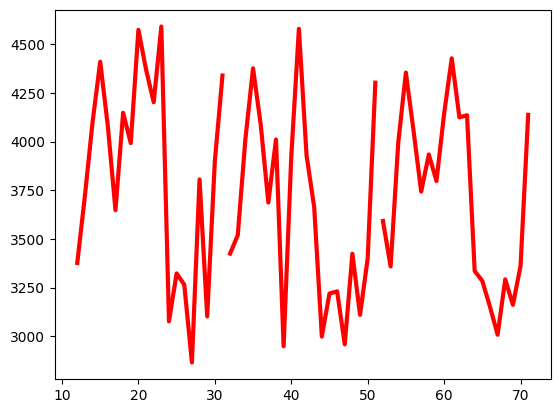

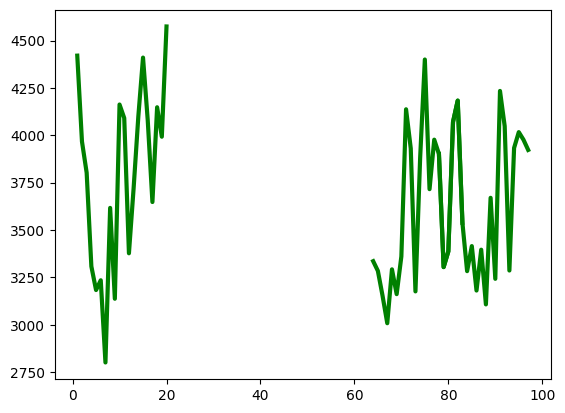

In [27]:
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = X_paa[0][0][i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

In [28]:
m_shape

array([3901.61530099, 3304.14222852, 3386.86546844, 4070.4512393 ,
       4182.89946858, 3537.92685489, 3282.69713904, 3414.8650441 ,
       3180.37934153, 3395.90728975, 3107.18170468, 3669.81949234,
       3242.24978884, 4233.99039915, 4047.8655427 , 3286.00897722,
       3932.91739925, 4016.5543097 , 3976.36701821, 3922.55177364])

In [39]:
# let's store the motifs for every time series in an array 
# that means an array of arrays that contain the motifs and the minimum matrix profile value for each motif set
X_paa = X_paa.squeeze()
motifs_ts = []
w = 20
for a in range(len(X_paa)):
    mp, mpi = matrixProfile.stomp(X_paa[a], w)
    mo, mod  = motifs.motifs(X_paa[a], (mp, mpi), max_motifs=5)
    aux = [mo, mod]
    motifs_ts.append(aux)    